In [65]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data=pd.read_csv("/home/compess/Desktop/Books_Data_Clean.csv")
data.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [67]:
# Count the missing values in each column
missing_values = data.isnull().sum()
print(missing_values)


index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64


Using info():
This gives you an overview of the DataFrame, including the number of non-null entries per column, which can help spot columns with missing data.

In [69]:
# Display a concise summary of the DataFrame including non-null counts
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

If you prefer to fill in the missing values, you might choose different strategies for numeric and categorical data:

For Numeric Columns (e.g., Publishing Year):
Use a statistic like the mean or median. Since there is only 1 missing value in "Publishing Year", filling with the median (or mean) might be a good option.

For Categorical Columns (e.g., Book Name, language_code):
Fill missing values with a placeholder such as "Unknown" or "Missing".

In [71]:
# For the numeric column 'Publishing Year'
data['Publishing Year'] = data['Publishing Year'].fillna(data['Publishing Year'].median())

# For categorical columns
data['Book Name'] = data['Book Name'].fillna("Unknown Book Name")
data['language_code'] = data['language_code'].fillna("Unknown")

# Verify that missing values have been handled
print(data.isnull().sum())


index                  0
Publishing Year        0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64


## Checking for data inconsistencies
1. Start by reviewing the overall structure of your DataFrame:
print(data.info())
2. Check for Duplicate Records
Sometimes duplicate rows can introduce inconsistency
3. Identify Inconsistent Categorical Data
For categorical columns, such as language_code and genre, examine the unique values

Fixing Inconsistent Language Codes
You might notice that some language codes are represented as "eng" and others as "en-US". Decide on a standard format and replace the values:

In [73]:
# Count duplicate rows
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# If duplicates are not needed, you can remove them:
data = data.drop_duplicates()


Number of duplicate rows: 0


In [74]:
# Check unique values for language_code
print("Unique language codes:", data['language_code'].unique())

# Check unique values for genre
print("Unique genres:", data['genre'].unique())


Unique language codes: ['en-US' 'eng' 'Unknown' 'spa' 'en-GB' 'fre' 'en-CA' 'nl' 'ara']
Unique genres: ['genre fiction' 'fiction' 'nonfiction' 'children']


In [75]:
#Fixing Inconsistent Language Codes
# Define a mapping to standardize language codes
language_map = {
    'eng': 'en-US',
    # Add other mappings if needed
}

data['language_code'] = data['language_code'].replace(language_map)


# Detect and Handle Outliers in Numeric Data
Step 1:
The original data is copied into data_original so that you can compare before and after cleaning.

Step 2:
A box plot (and optionally a histogram) of the sale price column is created to visualize the distribution and spot any outliers.

Step 3:
The Interquartile Range (IQR) is calculated, and lower/upper bounds are set using the formula:

Lower Bound
=
𝑄
1
−
1.5
×
IQR
and
Upper Bound
=
𝑄
3
+
1.5
×
IQR
Lower Bound=Q1−1.5×IQRandUpper Bound=Q3+1.5×IQR
Outliers outside these bounds are then filtered out, and the cleaned dataset is stored in data_cleaned.

Step 4:
The distribution of sale price is visualized again using a box plot (and a histogram) to confirm that outliers have been removed.

By comparing the plots from before and after cleaning, you can visually confirm the impact of your outlier removal process.
 

visualize the original sale price distribution beofre fixing the outliers


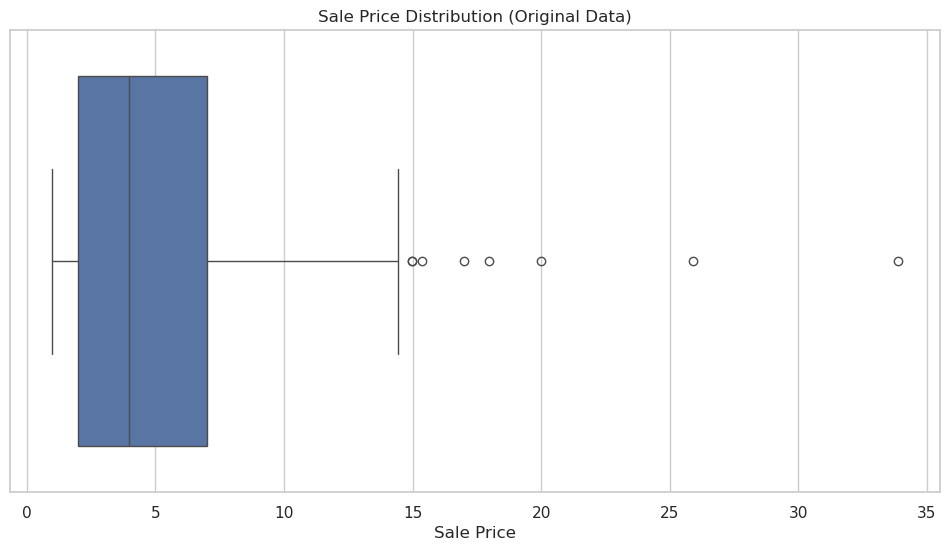

original histogram before otliers are fixed


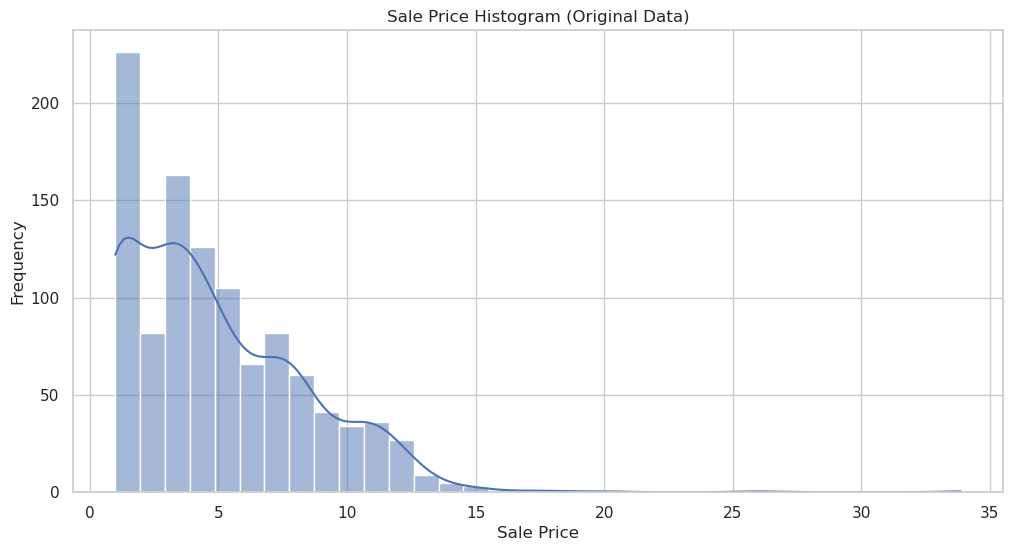

Lower Bound: -5.51
Upper Bound: 14.49
Visualize the sale price distribution after removing outliers


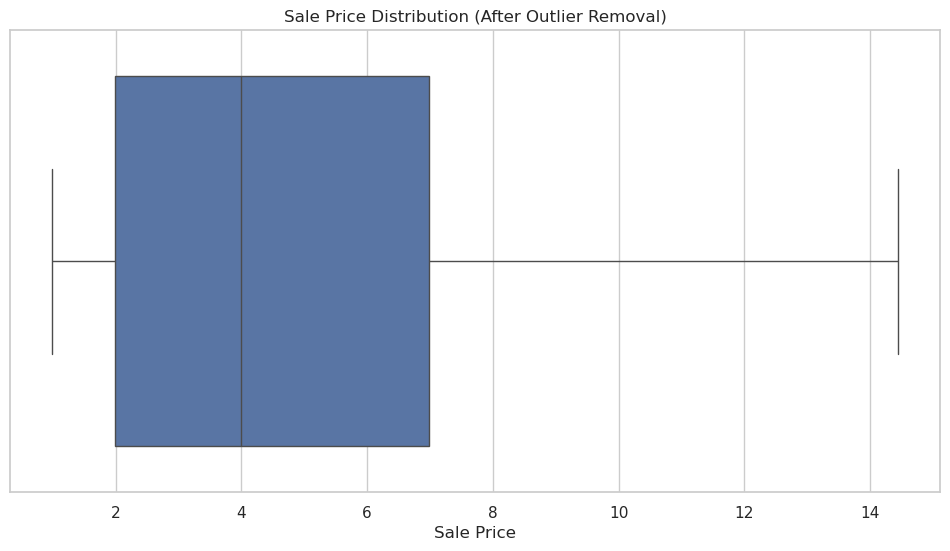

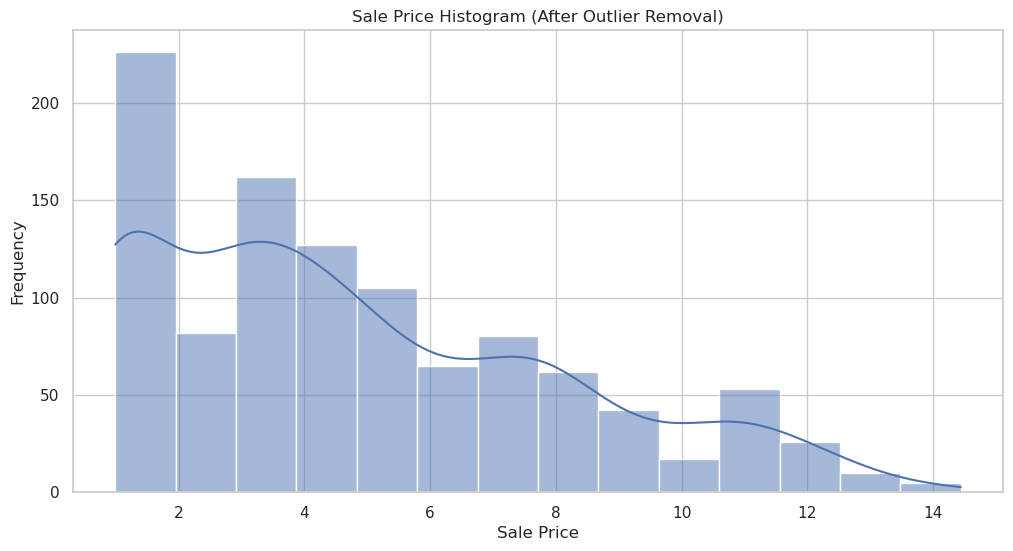

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a copy of the original data
data_original = data.copy()
# --- 1. Visualize the original "sale price" distribution before fixing the outliers  ---
print("visualize the original sale price distribution beofre fixing the outliers")

plt.figure(figsize=(12, 6))
sns.boxplot(x=data_original['sale price'])
plt.title('Sale Price Distribution (Original Data)')
plt.xlabel('Sale Price')
plt.show()

# Optionally, you can also view a histogram:
print("original histogram before otliers are fixed")
plt.figure(figsize=(12, 6))
sns.histplot(data_original['sale price'], kde=True)
plt.title('Sale Price Histogram (Original Data)')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# --- 2. Calculate IQR and define bounds for outlier detection ---
Q1 = data_original['sale price'].quantile(0.25)
Q3 = data_original['sale price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# --- 3. Filter out outliers ---
data_cleaned = data_original[
    (data_original['sale price'] >= lower_bound) &
    (data_original['sale price'] <= upper_bound)
]

# --- 4. Visualize the "sale price" distribution after removing outliers ---
print("Visualize the sale price distribution after removing outliers")
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_cleaned['sale price'])
plt.title('Sale Price Distribution (After Outlier Removal)')
plt.xlabel('Sale Price')
plt.show()

# Optionally, also view a histogram for the cleaned data:
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['sale price'], kde=True)
plt.title('Sale Price Histogram (After Outlier Removal)')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Data Transformation Overview

In this notebook, we perform a series of data transformation steps to prepare our dataset for analysis and modeling. The key steps are:

1. **Normalization (Min-Max Scaling):**  
   Scale numerical features (e.g., `sale price`) to a fixed range (0 to 1) using `MinMaxScaler`.

2. **Standardization (Z-Score Scaling):**  
   Scale numerical features to have a mean of 0 and a standard deviation of 1 using `StandardScaler`.

3. **Encoding Categorical Variables:**  
   - **One-Hot Encoding:** Convert categorical columns (e.g., `language_code`) into binary indicator variables.
   - **Label Encoding:** Convert ordinal categorical values (e.g., `Author_Rating`) into integer codes.

4. **Mathematical Transformation:**  
   Apply a log transformation to a skewed variable (`sale price`) to reduce skewness and stabilize variance.

5. **Handling Missing Values:**  
   Fill missing categorical values with a placeholder (e.g., "Unknown") before encoding.

Below, the code cell demonstrates these transformations on a sample dataset, and then prints out the transformed data.


In [79]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Create a sample DataFrame similar to our dataset
data = pd.DataFrame({
    'sale price': [4.88, 1.99, 8.69, 7.50, 7.99],
    'language_code': ['en-US', 'eng', 'eng', 'en-US', None],
    'Author_Rating': ['Novice', 'Intermediate', 'Novice', 'Intermediate', 'Intermediate']
})

print("Original Data:")
print(data)
print("\n" + "="*50 + "\n")

# 1. Normalize 'sale price' using Min-Max Scaling
scaler_minmax = MinMaxScaler()
data['sale price_normalized'] = scaler_minmax.fit_transform(data[['sale price']])

# 2. Standardize 'sale price' using Z-Score Scaling
scaler_standard = StandardScaler()
data['sale price_standardized'] = scaler_standard.fit_transform(data[['sale price']])

# 3. Encode Categorical Variables
# 3a. One-Hot Encoding for 'language_code'
# First, fill missing values in 'language_code' with "Unknown"
data['language_code'] = data['language_code'].fillna('Unknown')
data = pd.get_dummies(data, columns=['language_code'], prefix='lang')

# 3b. Label Encoding for 'Author_Rating'
le = LabelEncoder()
data['Author_Rating_encoded'] = le.fit_transform(data['Author_Rating'])

# 4. Apply Log Transformation to 'sale price'
# (Add 1 to avoid issues with log(0))
data['sale price_log'] = np.log(data['sale price'] + 1)

# Display the transformed data
print("Transformed Data:")
print(data)


Original Data:
   sale price language_code Author_Rating
0        4.88         en-US        Novice
1        1.99           eng  Intermediate
2        8.69           eng        Novice
3        7.50         en-US  Intermediate
4        7.99          None  Intermediate


Transformed Data:
   sale price Author_Rating  sale price_normalized  sale price_standardized  \
0        4.88        Novice               0.431343                -0.537971   
1        1.99  Intermediate               0.000000                -1.706944   
2        8.69        Novice               1.000000                 1.003133   
3        7.50  Intermediate               0.822388                 0.521791   
4        7.99  Intermediate               0.895522                 0.719991   

   lang_Unknown  lang_en-US  lang_eng  Author_Rating_encoded  sale price_log  
0         False        True     False                      1        1.771557  
1         False       False      True                      0        1.095273  
2

# Data Visualization Overview

In this section, we visualize our dataset to gain insights into the distributions, relationships, and patterns of the data. The key steps include:

1. **Distribution Visualization:**  
   - **Box Plot:** Identify the spread and detect any outliers in the numerical feature (e.g., `sale price`).
   - **Histogram:** Understand the frequency distribution of `sale price` and assess its skewness.

2. **Relationship Visualization:**  
   - **Scatter Plot:** Examine the relationship between `sale price` and its log-transformed version to understand how a transformation can stabilize variance.

3. **Correlation Visualization:**  
   - **Heatmap:** Visualize the correlation between numerical features to see how they interrelate.

4. **Categorical Data Visualization:**  
   - **Count Plot:** Display the frequency of different categories (e.g., `Author_Rating`) to understand the distribution of categorical values.

Below, the code cell executes these visualization steps and displays the output.


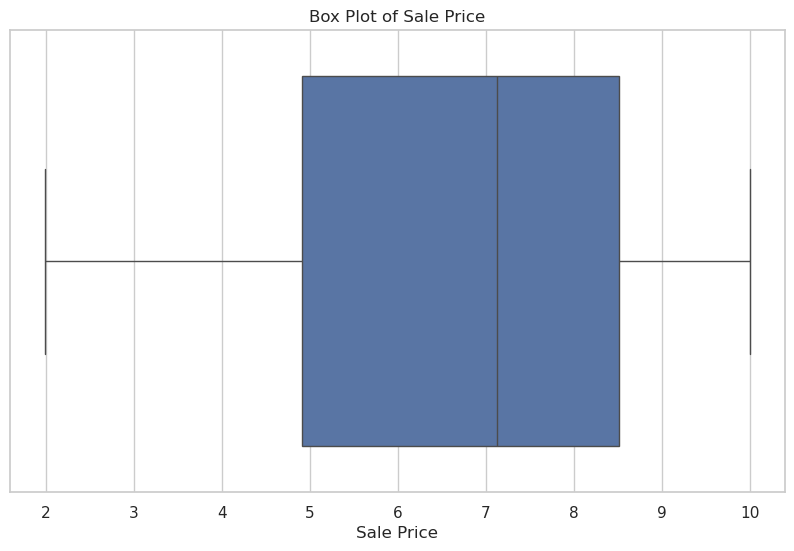

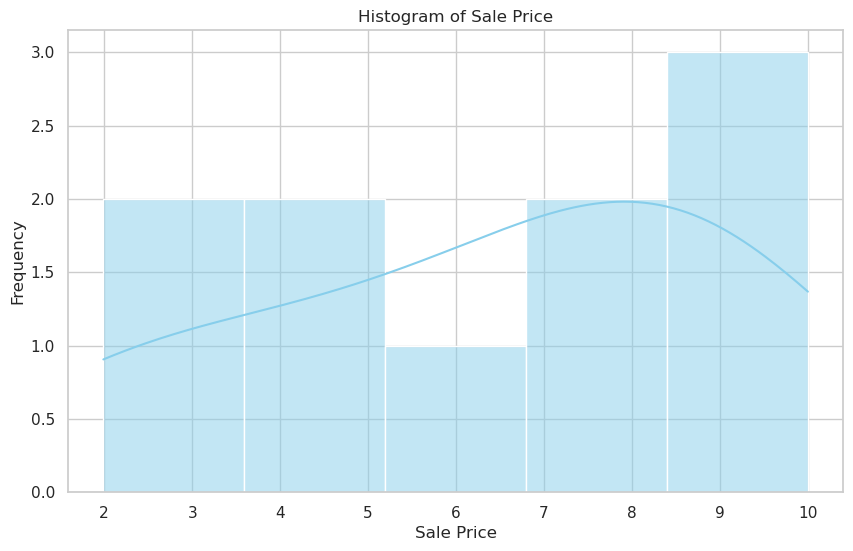

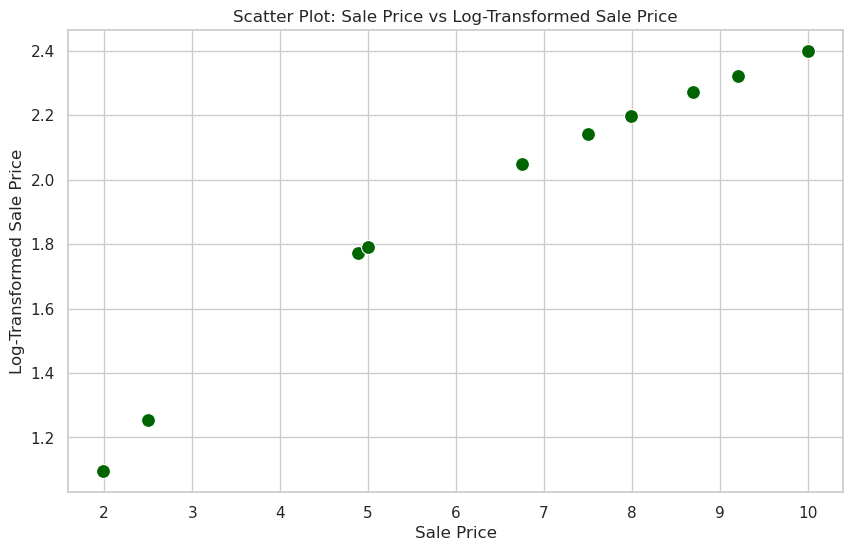

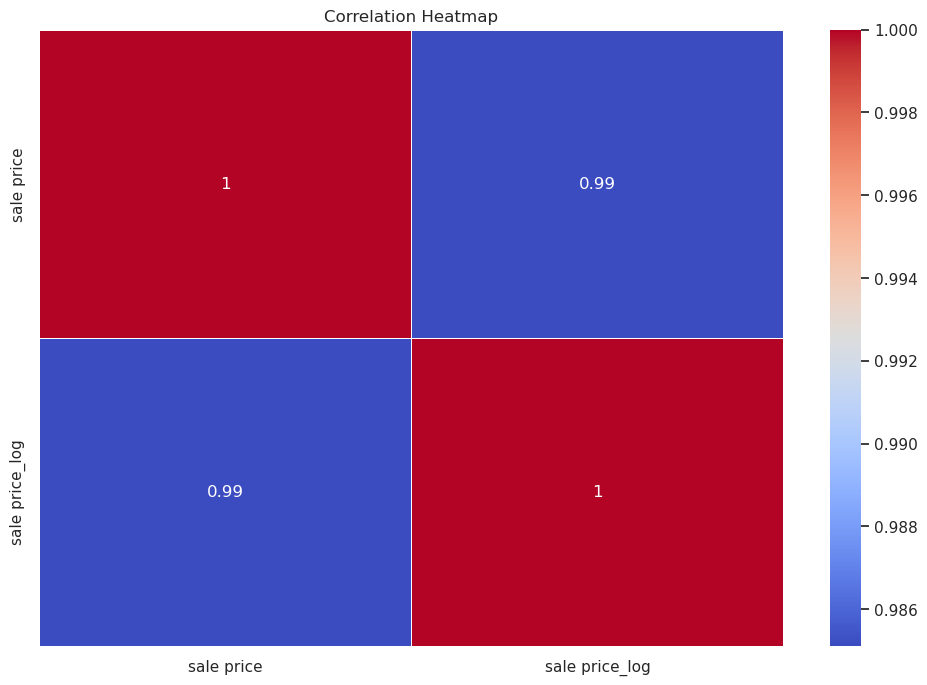

/tmp/ipykernel_20651/3272803427.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Author_Rating'], palette='Set2')


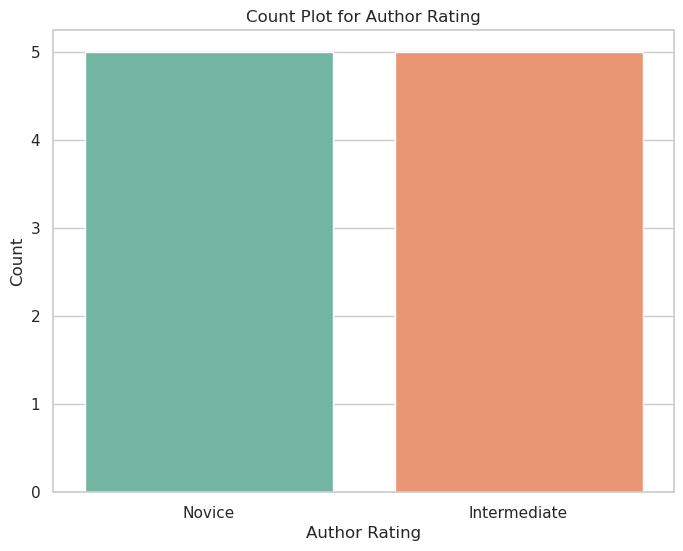

Sample Data:
   sale price Author_Rating  sale price_log
0        4.88        Novice        1.771557
1        1.99  Intermediate        1.095273
2        8.69        Novice        2.271094
3        7.50  Intermediate        2.140066
4        7.99  Intermediate        2.196113
5        5.00        Novice        1.791759
6       10.00        Novice        2.397895
7        2.50  Intermediate        1.252763
8        6.75        Novice        2.047693
9        9.20  Intermediate        2.322388


In [81]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame for demonstration purposes
data = pd.DataFrame({
    'sale price': [4.88, 1.99, 8.69, 7.50, 7.99, 5.00, 10.00, 2.50, 6.75, 9.20],
    'Author_Rating': ['Novice', 'Intermediate', 'Novice', 'Intermediate', 'Intermediate', 'Novice', 'Novice', 'Intermediate', 'Novice', 'Intermediate']
})

# For demonstration, create a log-transformed column for 'sale price'
data['sale price_log'] = np.log(data['sale price'] + 1)  # Add 1 to avoid log(0)

# Set the visualization style
sns.set(style="whitegrid")

# 1. Distribution Visualization
## a. Box Plot for 'sale price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['sale price'])
plt.title("Box Plot of Sale Price")
plt.xlabel("Sale Price")
plt.show()

## b. Histogram for 'sale price'
plt.figure(figsize=(10, 6))
sns.histplot(data['sale price'], kde=True, color='skyblue')
plt.title("Histogram of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

# 2. Relationship Visualization
## Scatter Plot: Sale Price vs. Log-Transformed Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['sale price'], y=data['sale price_log'], s=100, color='darkgreen')
plt.title("Scatter Plot: Sale Price vs Log-Transformed Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Log-Transformed Sale Price")
plt.show()

# 3. Correlation Visualization
## Compute correlation matrix for numerical columns
plt.figure(figsize=(12, 8))
corr_matrix = data[['sale price', 'sale price_log']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 4. Categorical Data Visualization
## Count Plot for 'Author_Rating'
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Author_Rating'], palette='Set2')
plt.title("Count Plot for Author Rating")
plt.xlabel("Author Rating")
plt.ylabel("Count")
plt.show()

# Display the DataFrame for reference
print("Sample Data:")
print(data)


# Data Filtering Overview

Data filtering is an essential step in data cleaning and analysis. It allows us to extract only the relevant subset of data that meets certain criteria. In this section, we demonstrate common data filtering techniques:

1. **Numeric Filtering:**  
   Extract rows where a numeric column meets a specific condition (e.g., `sale price` greater than a threshold).

2. **Categorical Filtering:**  
   Extract rows based on categorical values (e.g., selecting rows where `Author_Rating` equals "Intermediate").

3. **Combined Filtering:**  
   Apply multiple filtering conditions at the same time (e.g., `sale price` greater than a threshold and `Author_Rating` equal to "Intermediate").

Below, the code cell demonstrates these filtering techniques on a sample dataset.


In [83]:
# Import necessary libraries
import pandas as pd

# Create a sample DataFrame similar to our dataset
data = pd.DataFrame({
    'sale price': [4.88, 1.99, 8.69, 7.50, 7.99, 5.00, 10.00, 2.50, 6.75, 9.20],
    'Author_Rating': ['Novice', 'Intermediate', 'Novice', 'Intermediate', 'Intermediate', 
                      'Novice', 'Novice', 'Intermediate', 'Novice', 'Intermediate'],
    'units sold': [7000, 6250, 5500, 5500, 4750, 6800, 8000, 6000, 7200, 6500]
})

print("Original Data:")
print(data)

# -----------------------------------
# 1. Numeric Filtering
#    Filter rows where 'sale price' is greater than 7.0.
filtered_numeric = data[data['sale price'] > 7.0]
print("\nFiltered Data (sale price > 7.0):")
print(filtered_numeric)

# -----------------------------------
# 2. Categorical Filtering
#    Filter rows where 'Author_Rating' is 'Intermediate'.
filtered_categorical = data[data['Author_Rating'] == 'Intermediate']
print("\nFiltered Data (Author_Rating == 'Intermediate'):")
print(filtered_categorical)

# -----------------------------------
# 3. Combined Filtering
#    Filter rows where 'sale price' > 7.0 and 'Author_Rating' is 'Intermediate'.
filtered_combined = data[(data['sale price'] > 7.0) & (data['Author_Rating'] == 'Intermediate')]
print("\nFiltered Data (sale price > 7.0 and Author_Rating == 'Intermediate'):")
print(filtered_combined)


Original Data:
   sale price Author_Rating  units sold
0        4.88        Novice        7000
1        1.99  Intermediate        6250
2        8.69        Novice        5500
3        7.50  Intermediate        5500
4        7.99  Intermediate        4750
5        5.00        Novice        6800
6       10.00        Novice        8000
7        2.50  Intermediate        6000
8        6.75        Novice        7200
9        9.20  Intermediate        6500

Filtered Data (sale price > 7.0):
   sale price Author_Rating  units sold
2        8.69        Novice        5500
3        7.50  Intermediate        5500
4        7.99  Intermediate        4750
6       10.00        Novice        8000
9        9.20  Intermediate        6500

Filtered Data (Author_Rating == 'Intermediate'):
   sale price Author_Rating  units sold
1        1.99  Intermediate        6250
3        7.50  Intermediate        5500
4        7.99  Intermediate        4750
7        2.50  Intermediate        6000
9        9.20  Inter

# Data Aggregation Overview

Data aggregation is the process of summarizing data by performing calculations such as sum, mean, count, or other statistical operations on groups of data. It helps in analyzing trends and making data-driven decisions.

## Steps in Data Aggregation:
1. **Group Data by Categorical Column(s):**  
   - Use the `groupby()` function to group the dataset by categorical values.
   
2. **Apply Aggregation Functions:**  
   - Compute summary statistics such as:
     - **Sum (`sum()`)** – Total units sold, total revenue, etc.
     - **Mean (`mean()`)** – Average sale price, average rating, etc.
     - **Count (`count()`)** – Number of books per category.
     - **Maximum (`max()`) & Minimum (`min()`)** – Highest and lowest sales, ratings, etc.

3. **Display Aggregated Data:**  
   - Use `.reset_index()` to format grouped results into a clean DataFrame.

Below, the code cell performs data aggregation on a sample dataset.


In [86]:
# Import necessary libraries
import pandas as pd

# Create a sample DataFrame
data = pd.DataFrame({
    'Book Name': ['Book A', 'Book B', 'Book C', 'Book D', 'Book E', 'Book F', 'Book G', 'Book H', 'Book I', 'Book J'],
    'Publisher': ['Penguin', 'HarperCollins', 'Penguin', 'Amazon', 'HarperCollins', 'Amazon', 'Penguin', 'Amazon', 'HarperCollins', 'Penguin'],
    'Author_Rating': ['Novice', 'Intermediate', 'Novice', 'Intermediate', 'Intermediate', 
                      'Novice', 'Novice', 'Intermediate', 'Novice', 'Intermediate'],
    'sale price': [10.99, 5.50, 7.75, 8.99, 6.50, 9.25, 4.99, 11.00, 7.25, 5.99],
    'units sold': [5000, 7000, 6000, 6500, 7200, 5800, 5300, 6200, 7500, 6800],
    'gross sales': [54950, 38500, 46500, 58435, 46800, 53650, 26450, 68200, 54375, 40732]
})

print("Original Data:")
print(data)

# -----------------------------------
# 1. Aggregate Total Sales per Publisher
publisher_sales = data.groupby('Publisher')['gross sales'].sum().reset_index()
print("\nTotal Gross Sales per Publisher:")
print(publisher_sales)

# -----------------------------------
# 2. Average Sale Price per Author Rating
avg_price_by_rating = data.groupby('Author_Rating')['sale price'].mean().reset_index()
print("\nAverage Sale Price per Author Rating:")
print(avg_price_by_rating)

# -----------------------------------
# 3. Count of Books per Publisher
books_per_publisher = data.groupby('Publisher')['Book Name'].count().reset_index()
print("\nCount of Books per Publisher:")
print(books_per_publisher)


Original Data:
  Book Name      Publisher Author_Rating  sale price  units sold  gross sales
0    Book A        Penguin        Novice       10.99        5000        54950
1    Book B  HarperCollins  Intermediate        5.50        7000        38500
2    Book C        Penguin        Novice        7.75        6000        46500
3    Book D         Amazon  Intermediate        8.99        6500        58435
4    Book E  HarperCollins  Intermediate        6.50        7200        46800
5    Book F         Amazon        Novice        9.25        5800        53650
6    Book G        Penguin        Novice        4.99        5300        26450
7    Book H         Amazon  Intermediate       11.00        6200        68200
8    Book I  HarperCollins        Novice        7.25        7500        54375
9    Book J        Penguin  Intermediate        5.99        6800        40732

Total Gross Sales per Publisher:
       Publisher  gross sales
0         Amazon       180285
1  HarperCollins       139675
2  